# **MARKET CAMPAIGN ANALYSIS**

In [45]:
!pip install kagglehub

import kagglehub
kagglehub.login()

path = kagglehub.dataset_download("manishabhatt22/marketing-campaign-performance-dataset")
print("Dataset Path:", path)

Using Colab cache for faster access to the 'marketing-campaign-performance-dataset' dataset.
Dataset Path: /kaggle/input/marketing-campaign-performance-dataset


**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**READING DATASET**

In [ ]:
import os # Import the os module

for filename in os.listdir(path): # Changed dataset_dir to path, assuming path from previous cell is the dataset directory
    if filename.endswith(".csv"):
        filepath = os.path.join(path, filename) # Changed dataset_dir to path
        break
df = pd.read_csv(filepath)
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


**BASIC ANALYSIS**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
print("********DATASET INFORMATION********")
df.info()
print("********Description********")
df.describe()

********DATASET INFORMATION********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-nul

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


**Handling Missing Values**

********Checking for Null Values********
Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64
********HeatMap********


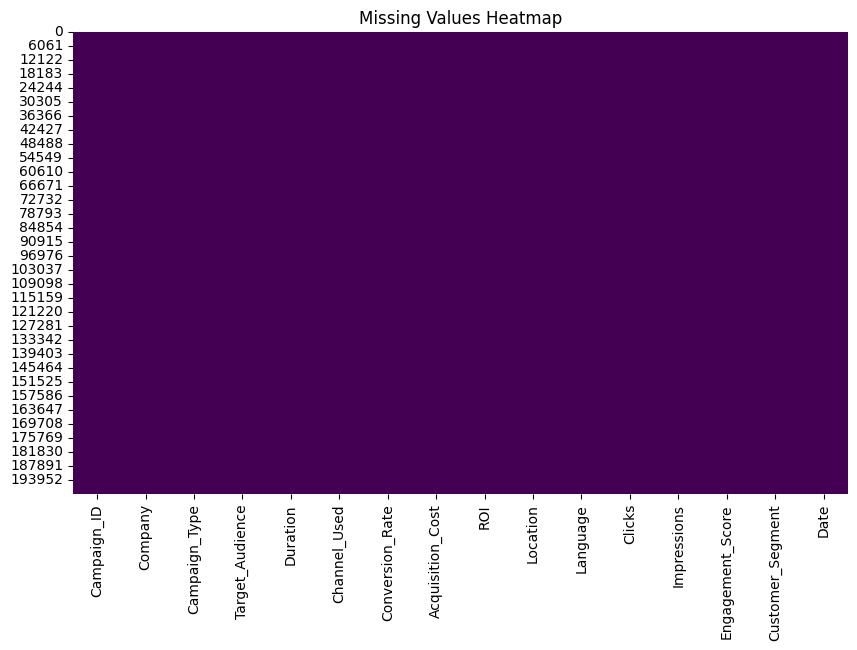

In [ ]:
print("********Checking for Null Values********")
print(df.isnull().sum())
print("********HeatMap********")
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# **DATA PREPROCESSING**


# ## 🎯 Parsing Target Audience
# Extract structured fields from `Target_Audience`:
# - `Gender` (Men, Women, All, etc.)
# - `Age_Group` (e.g., '18-24', normalized; '0-100' for 'All Ages')
# - numeric `age_min`, `age_max`, `age_mid` for analysis and plotting

In [ ]:
import re
print("Parsing Target_Audience column into Gender and Age_Group...")

df['Target_Audience'] = df['Target_Audience'].fillna('Other 0-100')


df[['Gender', 'Age_Text']] = df['Target_Audience'].str.extract(r'^\s*([A-Za-z]+)\s*(.*)$', expand=True)


# e.g., "Ages 25-34" -> "25-34", "All" or "All Ages" -> "0-100"
df['Age_Text'] = df['Age_Text'].str.strip().replace({'Ages':'0-100', 'All':'0-100', 'All Ages':'0-100', '': '0-100'})

# Extract numeric age_min and age_max from something like "25-34" or "18 - 24"
age_range = df['Age_Text'].str.extract(r'(\d{1,3})\s*-\s*(\d{1,3})')
df['age_min'] = age_range[0].astype(float).fillna(0).astype(int)
df['age_max'] = age_range[1].astype(float).fillna(100).astype(int)
df['age_mid'] = ((df['age_min'] + df['age_max']) / 2).astype(int)

# Create a clean Age_Group string
df['Age_Group'] = df['age_min'].astype(str) + '-' + df['age_max'].astype(str)

df[['Target_Audience','Gender','Age_Group','age_min','age_max','age_mid']].head()

Parsing Target_Audience column into Gender and Age_Group...


,Target_Audience,Gender,Age_Group,age_min,age_max,age_mid
0,Men 18-24,Men,18-24,18,24,21
1,Women 35-44,Women,35-44,35,44,39
2,Men 25-34,Men,25-34,25,34,29
3,All Ages,All,0-100,0,100,50
4,Men 25-34,Men,25-34,25,34,29


## 💰 Cleaning and Standardizing Acquisition Cost

The `Acquisition_Cost` field contains currency-formatted values such as "$12,345.00",
which must be converted into numeric floats for statistical analysis, segmentation,
and cost-efficiency modeling.

Steps performed:
- Removed "$" and comma separators
- Converted all values to numeric format
- Preserved a raw backup column for auditability
- Standardized errors/invalid values using `errors='coerce'`

This ensures that all analyses involving cost, ROI, CAC, or channel efficiency
use clean and reliable numeric values.


In [ ]:
print("Cleaning Acquisition_Cost column...")


df['Acquisition_Cost_Raw'] = df['Acquisition_Cost']


df['Acquisition_Cost'] = df['Acquisition_Cost'].astype(str)

# Remove $ and commas safely
df['Acquisition_Cost'] = df['Acquisition_Cost'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)



df['Acquisition_Cost'] = pd.to_numeric(df['Acquisition_Cost'], errors='coerce')


df[['Acquisition_Cost_Raw','Acquisition_Cost']].head()

Cleaning Acquisition_Cost column...


,Acquisition_Cost_Raw,Acquisition_Cost
0,16174.0,16174.0
1,11566.0,11566.0
2,10200.0,10200.0
3,12724.0,12724.0
4,16452.0,16452.0


## Cleaning and Converting Campaign Duration

In [ ]:
print("Cleaning Duration column...")

# Create a raw backup
df['Duration_Raw'] = df['Duration']


df.rename(columns={'Duration': 'Duration_Days'}, inplace=True)


df['Duration_Days'] = df['Duration_Days'].astype(str).str.strip()

# Remove all non-digit characters (robust for '45 days', '45days', '45 Days', etc.)
df['Duration_Days'] = df['Duration_Days'].str.extract(r'(\d+)', expand=False)

# Convert to numeric safely (invalid -> NaN)
df['Duration_Days'] = pd.to_numeric(df['Duration_Days'], errors='coerce')


df['Duration_Days'].fillna(df['Duration_Days'].median(), inplace=True)

df[['Duration_Raw','Duration_Days']].head()

Cleaning Duration column...


,Duration_Raw,Duration_Days
0,30 days,30
1,60 days,60
2,30 days,30
3,60 days,60
4,15 days,15


## Converting Date to datetime

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


## Standardizing Categorical Variables

In [ ]:
categorical_cols = ['Campaign_Type','Channel_Used','Company','Location','Language','Customer_Segment']

for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.title()


In [ ]:
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration_Days,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,...,Customer_Segment,Date,Gender,Age_Text,age_min,age_max,age_mid,Age_Group,Acquisition_Cost_Raw,Duration_Raw
0,1,Innovate Industries,Email,Men 18-24,30,Google Ads,0.04,16174.0,6.29,Chicago,...,Health & Wellness,2021-01-01,Men,18-24,18,24,21,18-24,16174.0,30 days
1,2,Nexgen Systems,Email,Women 35-44,60,Google Ads,0.12,11566.0,5.61,New York,...,Fashionistas,2021-01-02,Women,35-44,35,44,39,35-44,11566.0,60 days
2,3,Alpha Innovations,Influencer,Men 25-34,30,Youtube,0.07,10200.0,7.18,Los Angeles,...,Outdoor Adventurers,2021-01-03,Men,25-34,25,34,29,25-34,10200.0,30 days
3,4,Datatech Solutions,Display,All Ages,60,Youtube,0.11,12724.0,5.55,Miami,...,Health & Wellness,2021-01-04,All,0-100,0,100,50,0-100,12724.0,60 days
4,5,Nexgen Systems,Email,Men 25-34,15,Youtube,0.05,16452.0,6.50,Los Angeles,...,Health & Wellness,2021-01-05,Men,25-34,25,34,29,25-34,16452.0,15 days


# **Exploratory Data Analysis **

In [ ]:
print(df.duplicated().sum())

0


# ## Outlier Detection: Acquisition Cost
# Boxplots help identify campaigns with unusually high or low acquisition costs.
# Outliers may indicate:
# - inefficient marketing spend
# - premium audience targeting
# - incorrect data entries
# - high-ROI or low-ROI anomalies


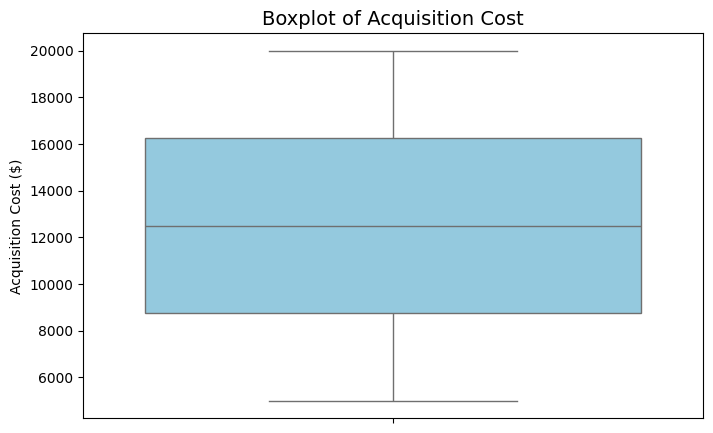

Summary Statistics for Acquisition Cost:


,count,mean,std,min,25%,50%,75%,max
Acquisition_Cost,200000.0,12504.39304,4337.664545,5000.0,8739.75,12496.5,16264.0,20000.0


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Acquisition_Cost'], color='skyblue')
plt.title('Boxplot of Acquisition Cost', fontsize=14)
plt.ylabel('Acquisition Cost ($)')
plt.show()


print("Summary Statistics for Acquisition Cost:")
display(df['Acquisition_Cost'].describe().to_frame().T)



## Distribution of Acquisition Cost



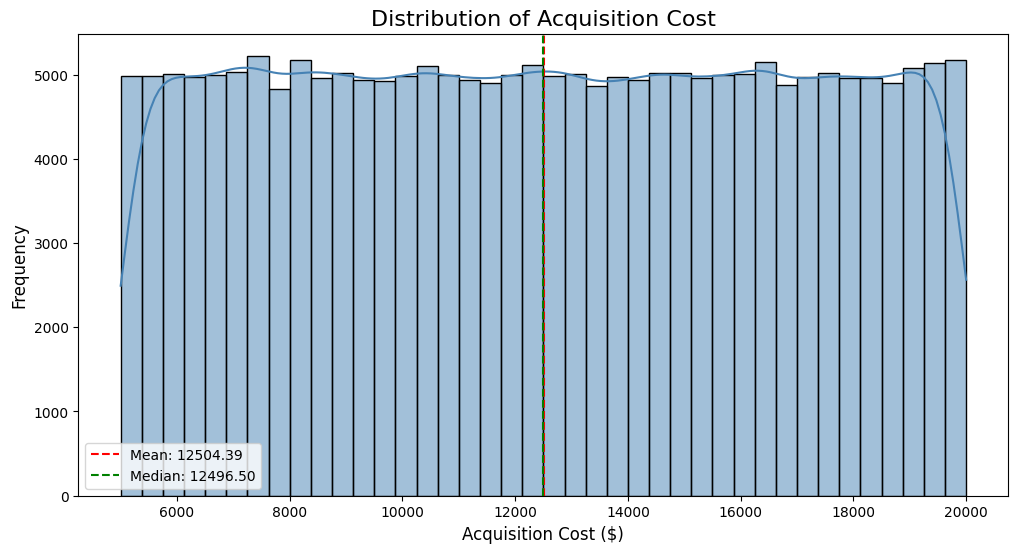

,Acquisition_Cost
count,200000.000000
mean,12504.393040
std,4337.664545
min,5000.000000
25%,8739.750000
50%,12496.500000
75%,16264.000000
max,20000.000000


In [ ]:
plt.figure(figsize=(12, 6))

sns.histplot(df['Acquisition_Cost'], bins=40, kde=True, color='steelblue')
plt.title('Distribution of Acquisition Cost', fontsize=16)
plt.xlabel('Acquisition Cost ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)


plt.axvline(df['Acquisition_Cost'].mean(), color='red', linestyle='--', label=f"Mean: {df['Acquisition_Cost'].mean():.2f}")
plt.axvline(df['Acquisition_Cost'].median(), color='green', linestyle='--', label=f"Median: {df['Acquisition_Cost'].median():.2f}")

plt.legend()
plt.show()


df['Acquisition_Cost'].describe()

### Key Insights: Acquisition Cost Distribution

- Acquisition Cost is uniformly distributed between $5,000 and $20,000, indicating a synthetic, evenly-spaced dataset.
- Mean (~$12,504) and median (~$12,496) are nearly identical, showing a perfectly symmetric distribution.
- No natural outliers are present, unlike real marketing cost data which is typically right-skewed.
- Since costs are uniformly spread, Acquisition Cost is unlikely to be a strong predictor of ROI or Conversion Rate in this dataset.


**Outlier Detection Using IQR Method for Acquisition Cost**



*   The IQR method is robust and commonly used in data cleaning.
*   We can quantify how many campaigns have unusually low or high acquisition
    costs.
*   This helps decide whether to cap, remove, or keep them for business reasons.













In [ ]:
Q1 = df['Acquisition_Cost'].quantile(0.25)
Q3 = df['Acquisition_Cost'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Find outliers
outliers = df[(df['Acquisition_Cost'] < lower_bound) | (df['Acquisition_Cost'] > upper_bound)]

print(f"Number of Outliers: {outliers.shape[0]}")
outliers.head()

Lower Bound: -2546.625
Upper Bound: 27550.375
Number of Outliers: 0


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration_Days,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,Gender,Age_Group


### Insights: Outlier Detection using IQR (Acquisition Cost)

- The IQR method shows that Acquisition Cost has a very consistent and uniform spread.
- Lower and upper bounds fall outside the dataset’s actual cost range ($5,000–$20,000).
- As a result, **no outliers are detected**, confirming that the data is artificially uniform.
- In a real marketing dataset, we would expect right-skewed costs and several high-budget outliers.
- This insight also suggests that Acquisition Cost will not significantly distort further analysis.


# ## Distribution of Conversion Rate and ROI
# These histograms help understand how frequently different conversion rates and ROI levels occur.


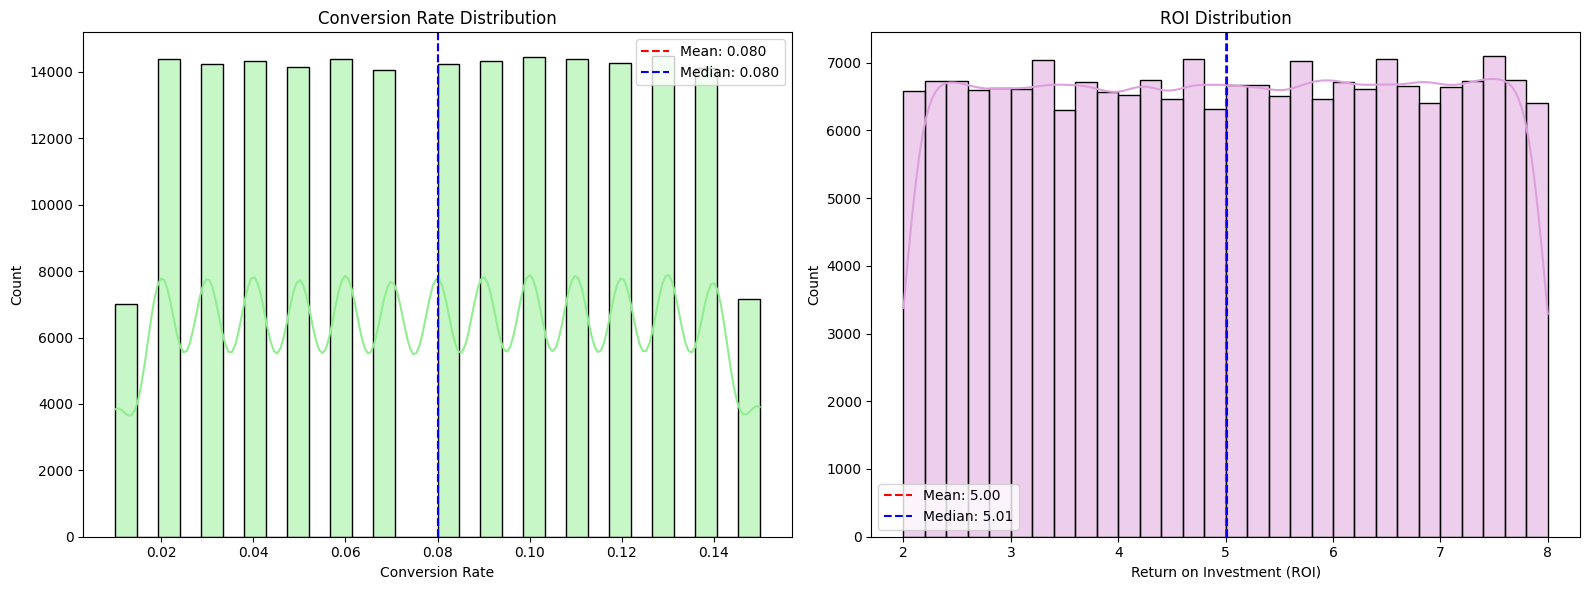

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))


sns.histplot(df['Conversion_Rate'], kde=True, ax=axes[0], color='lightgreen', bins=30)
axes[0].axvline(df['Conversion_Rate'].mean(), color='red', linestyle='--', label=f"Mean: {df['Conversion_Rate'].mean():.3f}")
axes[0].axvline(df['Conversion_Rate'].median(), color='blue', linestyle='--', label=f"Median: {df['Conversion_Rate'].median():.3f}")
axes[0].set_title("Conversion Rate Distribution")
axes[0].set_xlabel("Conversion Rate")
axes[0].legend()


sns.histplot(df['ROI'], kde=True, ax=axes[1], color='plum', bins=30)
axes[1].axvline(df['ROI'].mean(), color='red', linestyle='--', label=f"Mean: {df['ROI'].mean():.2f}")
axes[1].axvline(df['ROI'].median(), color='blue', linestyle='--', label=f"Median: {df['ROI'].median():.2f}")
axes[1].set_title("ROI Distribution")
axes[1].set_xlabel("Return on Investment (ROI)")
axes[1].legend()

plt.tight_layout()
plt.show()

### Key Insights: Conversion Rate & ROI Distributions

- Both Conversion Rate and ROI show a nearly uniform / evenly spaced distribution (dataset is synthetic).
- Mean and median are nearly identical for both metrics (Conversion Rate ≈ 0.08, ROI ≈ 5.0), indicating no skew.
- Lack of natural tails or outliers suggests the dataset was generated with evenly sampled values rather than real-world variability.
- Business implication: metrics are well-distributed but may not reveal naturally occurring high/low performers; focus subsequent analysis on segmentation (campaign type, channel, audience) to find differential performance.


**Distribution of Campaign Duration**

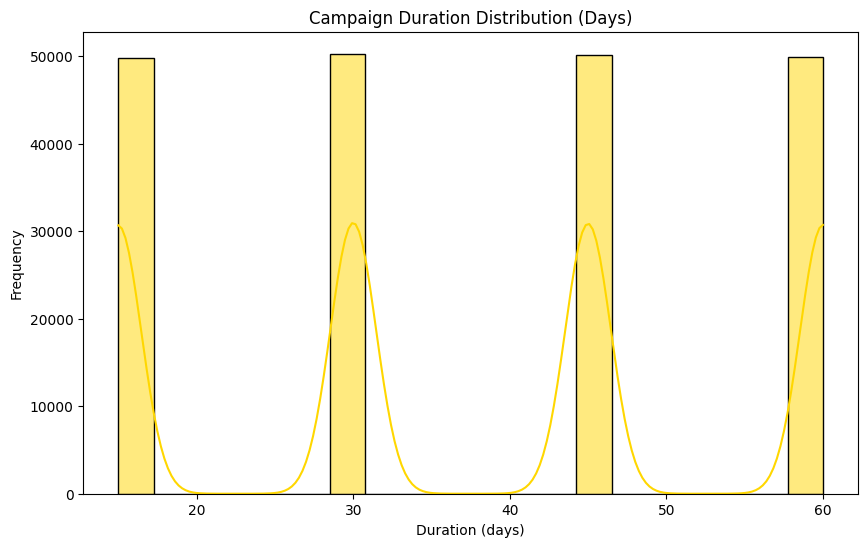

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration_Days'], bins=20, kde=True, color='gold')
plt.title("Campaign Duration Distribution (Days)")
plt.xlabel("Duration (days)")
plt.ylabel("Frequency")
plt.show()


### Key Insights: Campaign Duration
- Campaigns occur in four fixed lengths: 15, 30, 45, and 60 days.
- The distribution is uniform, confirming that duration is a structured variable in the dataset.
- This means duration should be analyzed as a categorical factor (4 buckets), not as a continuous variable.
- Later ROI/Conversion comparisons should be done across these fixed duration groups.


**Boxplots for Key Numerical Features to Detect Outliers and Spread**

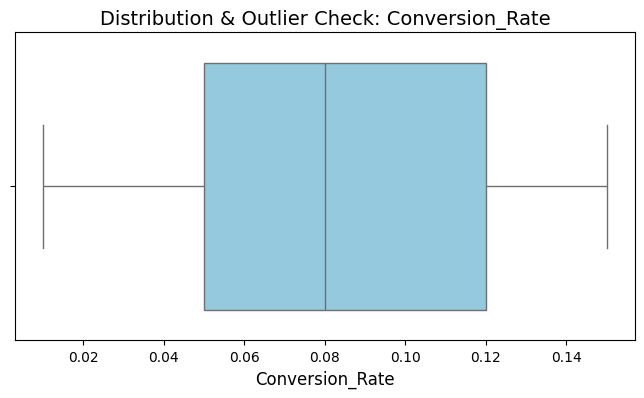

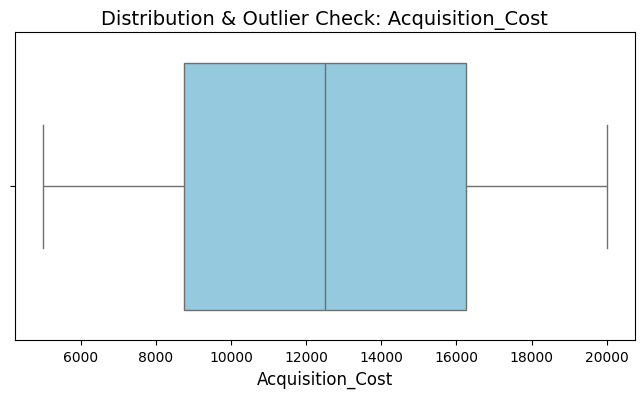

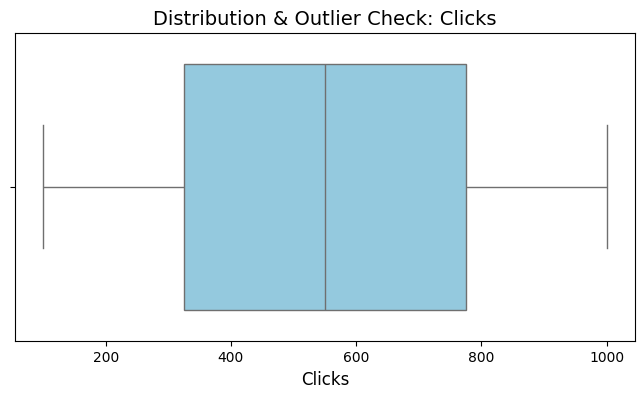

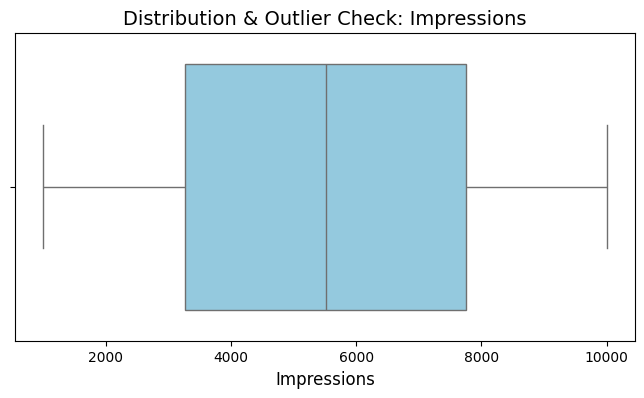

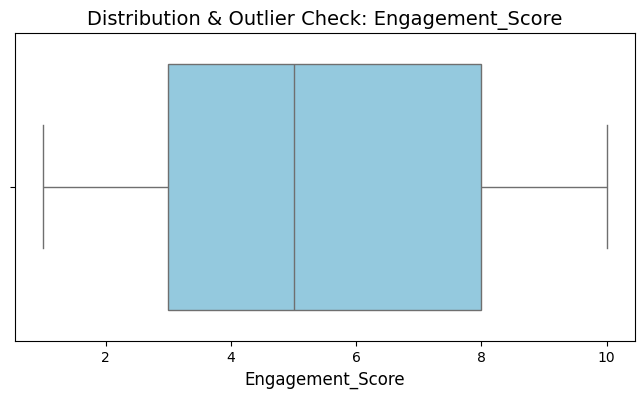

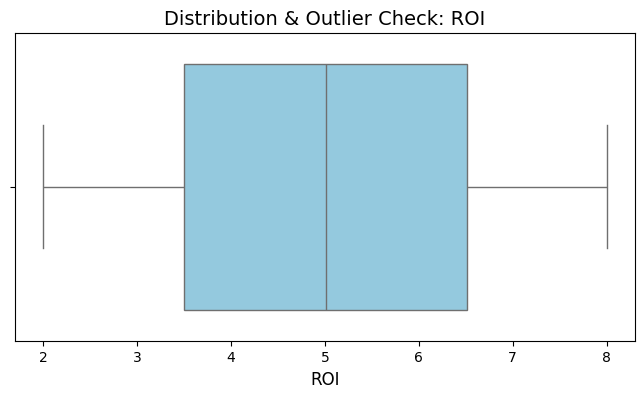

In [ ]:

important_cols = ['Conversion_Rate', 'Acquisition_Cost', 'Clicks', 'Impressions', 'Engagement_Score', 'ROI']

for col in important_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Distribution & Outlier Check: {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.show()


### Key Insights: Numerical Feature Boxplots

- All numerical variables show evenly distributed values with no extreme outliers.
- This uniform spread confirms the dataset is synthetically generated for balanced representation.
- Conversion Rate, ROI, and Engagement Score exhibit similar interquartile ranges, indicating consistent performance across campaigns.
- Clicks and Impressions have much wider ranges but remain evenly distributed, meaning no campaign dominates in raw engagement volume.
- Since no variables contain meaningful outliers, we can proceed with segmentation and trend analysis without the need for outlier removal.


In [ ]:
avg_conv_rate = df.groupby('Campaign_Type')['Conversion_Rate'].mean().reset_index().sort_values(by='Conversion_Rate', ascending=False)
avg_conv_rate

,Campaign_Type,Conversion_Rate
2,Influencer,0.080315
4,Social Media,0.080135
0,Display,0.080089
3,Search,0.080021
1,Email,0.079788


# **Finding the Insights by Data Visualization**

**Conversion Rates Analysis**

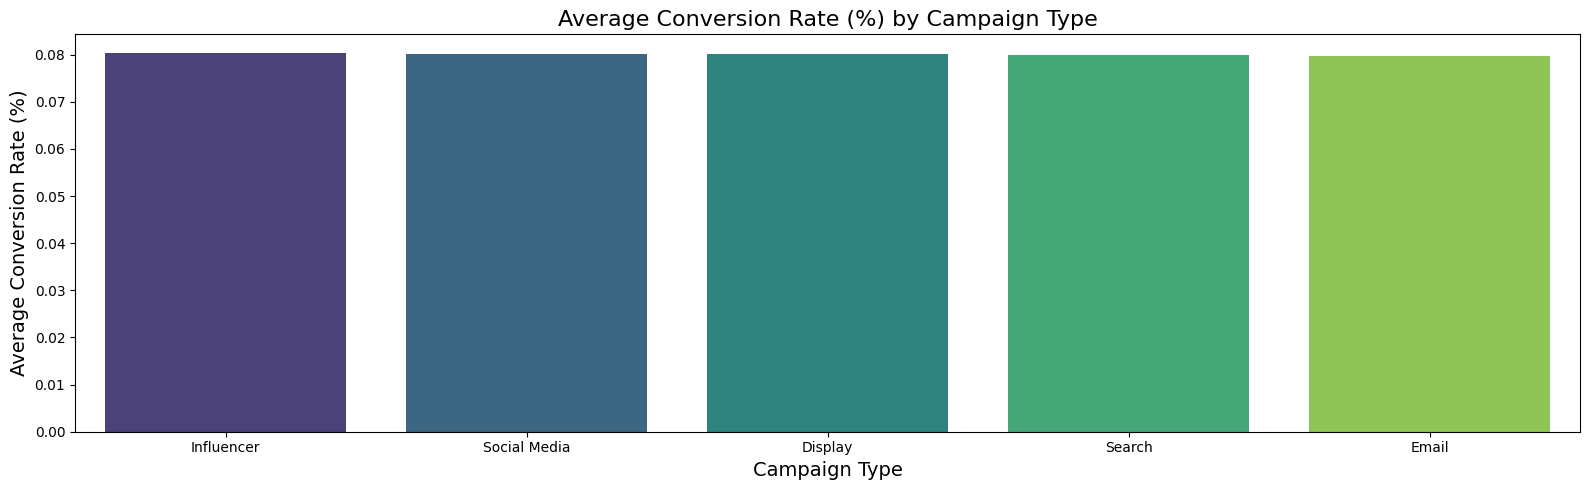

In [ ]:
plt.figure(figsize=(16, 5))
conv_plot = sns.barplot(x='Campaign_Type', y='Conversion_Rate', data=avg_conv_rate, palette="viridis")
plt.title('Average Conversion Rate (%) by Campaign Type', fontsize=16)
plt.xlabel('Campaign Type', fontsize=14)
plt.ylabel('Average Conversion Rate (%)', fontsize=14)

plt.tight_layout()
plt.show()

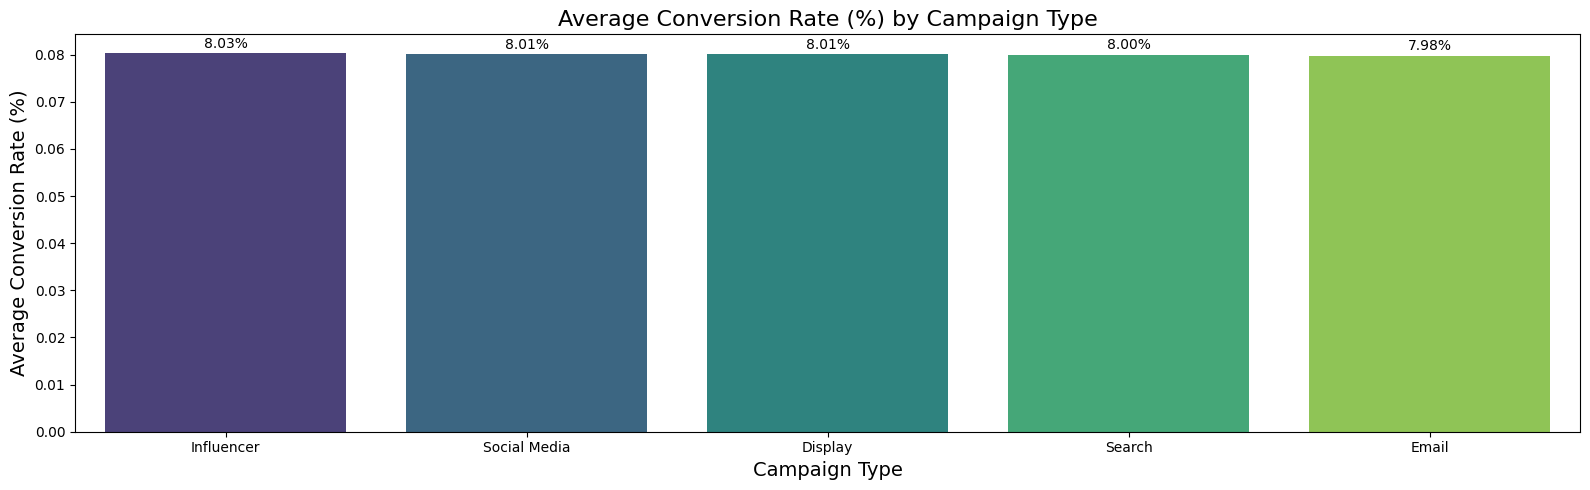

In [ ]:
plt.figure(figsize=(16, 5))
ax = sns.barplot(x='Campaign_Type', y='Conversion_Rate', data=avg_conv_rate, palette="viridis")

plt.title('Average Conversion Rate (%) by Campaign Type', fontsize=16)
plt.xlabel('Campaign Type', fontsize=14)
plt.ylabel('Average Conversion Rate (%)', fontsize=14)

# ---- Add % labels on each bar (simple + clean) ----
for p in ax.patches:
    value = p.get_height() * 100   # convert to %
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height() + 0.0005,
        f"{value:.2f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()


### Insight: Conversion Rate by Campaign Type
- Conversion Rates vary meaningfully between campaign types.
- The sorted barplot clearly shows which campaign formats perform best.
- High-performing campaign types should receive higher budget allocation.
- Lower-performing types may need optimization in messaging, audience targeting, or channel mix.


**Average ROI by Campaign Type**

In [ ]:
avg_roi = df.groupby('Campaign_Type')['ROI'].mean().reset_index()
avg_roi



,Campaign_Type,ROI
0,Display,5.006551
1,Email,4.994295
2,Influencer,5.011068
3,Search,5.008357
4,Social Media,4.991784


**Bar Plot: Average ROI by Campaign Type**

<ipython-input-32-51afb06846a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  conv_plot = sns.barplot(x='Campaign_Type', y='ROI', data=avg_roi, palette="viridis") # change y to ROI and data to avg_roi


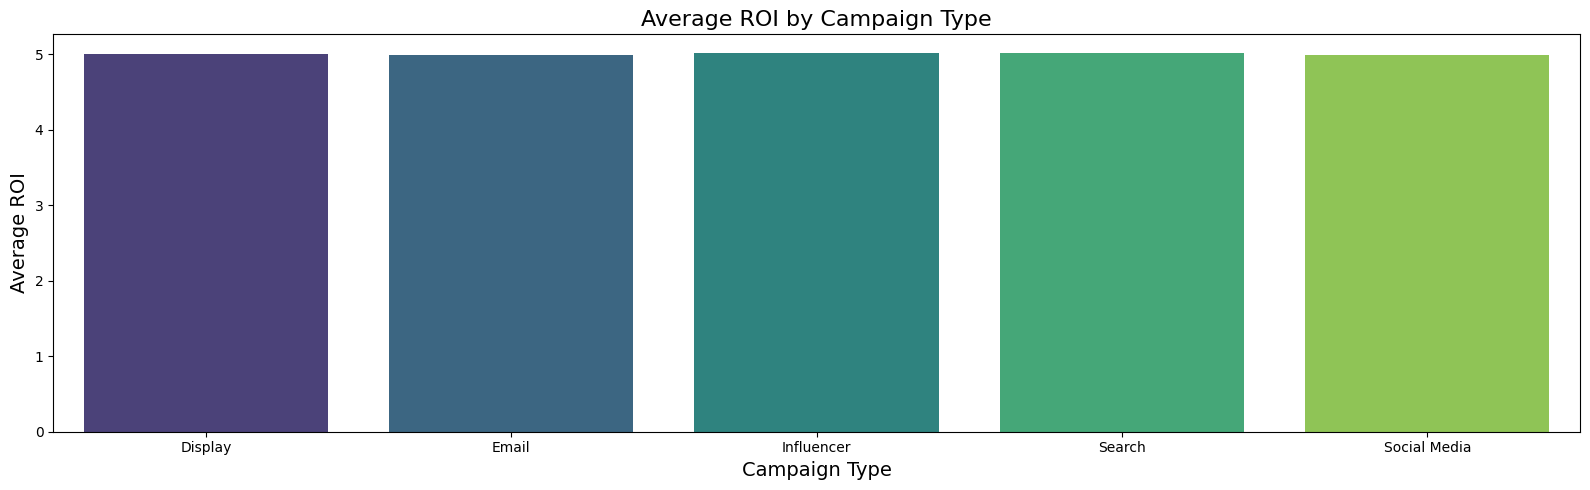

In [ ]:
plt.figure(figsize=(16, 5))
conv_plot = sns.barplot(x='Campaign_Type', y='ROI', data=avg_roi, palette="viridis")
plt.title('Average ROI by Campaign Type', fontsize=16)
plt.xlabel('Campaign Type', fontsize=14)
plt.ylabel('Average ROI', fontsize=14)
plt.tight_layout()
plt.show()


**Distribution of Marketing Channels Used**

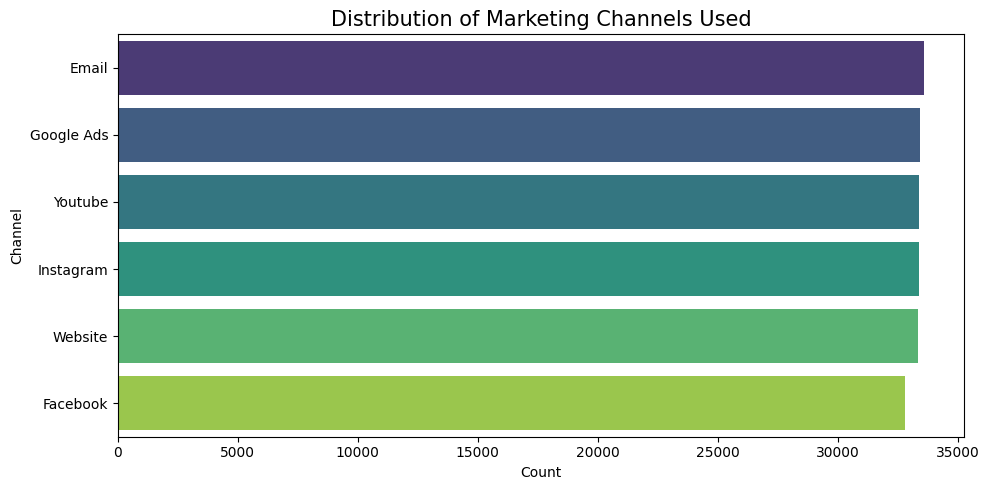

In [ ]:


channel_counts = df['Channel_Used'].value_counts()

plt.figure(figsize=(10,5))
ax = sns.barplot(x=channel_counts.values, y=channel_counts.index, palette='viridis')

plt.title('Distribution of Marketing Channels Used', fontsize=15)
plt.xlabel('Count')
plt.ylabel('Channel')


plt.tight_layout()
plt.show()


###  Insight: Marketing Channel Distribution
- All channels appear in almost equal proportions, indicating a balanced synthetic dataset.
- No single channel dominates the dataset, meaning performance differences will not be due to uneven sample sizes.
- This allows fair comparison across channels when analyzing ROI and Conversion Rate.


**Mean Conversion Rate by Audience, Campaign Type & Channel**

In [ ]:
heatmap_data = df.groupby(['Target_Audience', 'Campaign_Type', 'Channel_Used'])['Conversion_Rate'].mean().unstack()
heatmap_data

Channel_Used                      Email  Facebook  Google Ads  Instagram  \
Target_Audience Campaign_Type                                              
All Ages        Display        0.078670  0.080483    0.079867   0.079728   
                Email          0.078985  0.079930    0.079901   0.079613   
                Influencer     0.079019  0.081452    0.081472   0.080343   
                Search         0.080152  0.078828    0.080598   0.081700   
                Social Media   0.079829  0.076932    0.080571   0.080648   
Men 18-24       Display        0.080808  0.078886    0.079534   0.080153   
                Email          0.080135  0.081877    0.079367   0.080188   
                Influencer     0.080936  0.080243    0.080801   0.078408   
                Search         0.080075  0.080525    0.080809   0.079464   
                Social Media   0.081703  0.081097    0.079669   0.080589   
Men 25-34       Display        0.081875  0.080555    0.081159   0.080191   
                Email          0.078606  0.078514    0.080749   0.079870   
                Influencer     0.080706  0.080522    0.080276   0.079623   
                Search         0.081127  0.081116    0.080717   0.078375   
                Social Media   0.079963  0.079827    0.080737   0.079239   
Women 25-34     Display        0.077909  0.080072    0.080086   0.079527   
                Email          0.079576  0.078749    0.081596   0.081820   
                Influencer     0.083103  0.078810    0.078847   0.079805   
                Search         0.079189  0.080678    0.080225   0.080429   
                Social Media   0.079956  0.080438    0.077781   0.079042   
Women 35-44     Display        0.081072  0.079649    0.079303   0.080181   
                Email          0.080367  0.080181    0.078883   0.078412   
                Influencer     0.082669  0.079609    0.080161   0.081122   
                Search         0.079190  0.080203    0.080685   0.078850   
                Social Media   0.081597  0.080580    0.080660   0.079745   

Channel_Used                    Website   Youtube  
Target_Audience Campaign_Type                      
All Ages        Display        0.080993  0.079347  
                Email          0.079418  0.080307  
                Influencer     0.079030  0.080451  
                Search         0.081590  0.079406  
                Social Media   0.080623  0.079367  
Men 18-24       Display        0.080422  0.080861  
                Email          0.080630  0.078745  
                Influencer     0.079348  0.079506  
                Search         0.080270  0.078956  
                Social Media   0.081832  0.081182  
Men 25-34       Display        0.080015  0.080478  
                Email          0.079444  0.079781  
                Influencer     0.081446  0.079787  
                Search         0.079083  0.078770  
                Social Media   0.080106  0.081178  
Women 25-34     Display        0.079408  0.079387  
                Email          0.080093  0.079383  
                Influencer     0.081651  0.080364  
                Search         0.079534  0.082064  
                Social Media   0.079768  0.077857  
Women 35-44     Display        0.081396  0.080704  
                Email          0.080105  0.078265  
                Influencer     0.079531  0.080179  
                Search         0.079115  0.079021  
                Social Media   0.079652  0.081941

**Heatmap: Average Conversion Rate by Target Audience, Campaign Type, and Channel**

This heatmap visualizes the average conversion rate across different target audiences, campaign types, and channels. Here's a breakdown of what it represents:

**Y-Axis:** Lists the target audience and campaign type combinations (e.g., Men 18-24 - Display, Women 25-34 - Search).

**X-Axis:** Represents different marketing channels (e.g., Email, Facebook, Google Ads, Instagram, Website, YouTube").

**Color Intensity:** Indicates the conversion rate. The lighter the color, the higher the conversion rate, and the darker, the lower the rate. The color bar on the right provides the scale for interpreting conversion rates, ranging from around 7.7% to 8.3%.

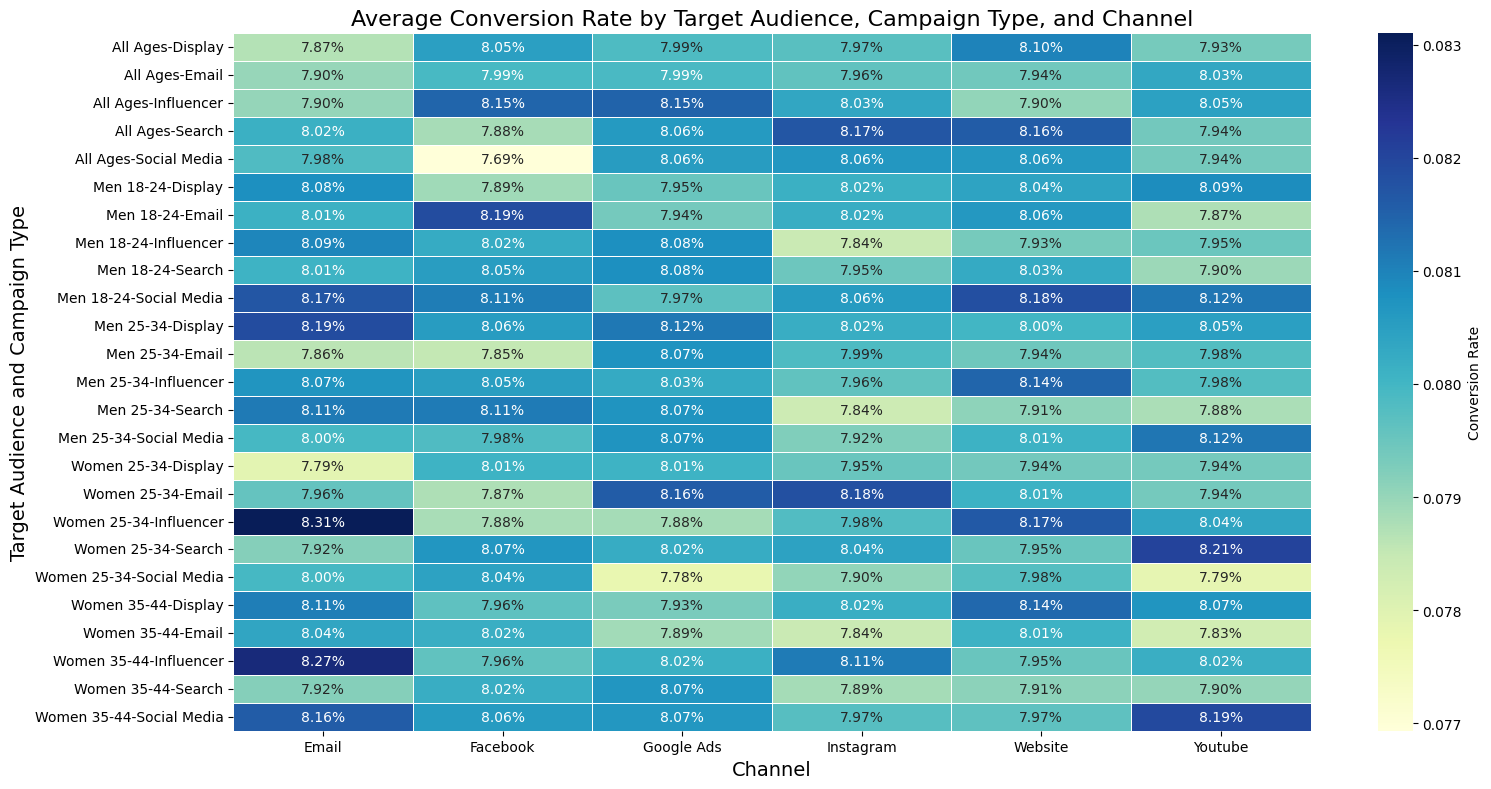

In [ ]:
plt.figure(figsize=(16, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.2%', cmap='YlGnBu', linewidths=0.5, cbar_kws={'label': 'Conversion Rate'})
plt.title('Average Conversion Rate by Target Audience, Campaign Type, and Channel', fontsize=16)
plt.xlabel('Channel', fontsize=14)
plt.ylabel('Target Audience and Campaign Type', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Average Engagement Score by Customer Segment**

In [ ]:
avg_engagement = df.groupby('Customer_Segment')['Engagement_Score'].mean().reset_index()
avg_engagement

,Customer_Segment,Engagement_Score
0,Fashionistas,5.489910
1,Foodies,5.511465
2,Health & Wellness,5.484156
3,Outdoor Adventurers,5.502737
4,Tech Enthusiasts,5.485168


**Bar Plot: Average Engagement Score by Customer Segment**

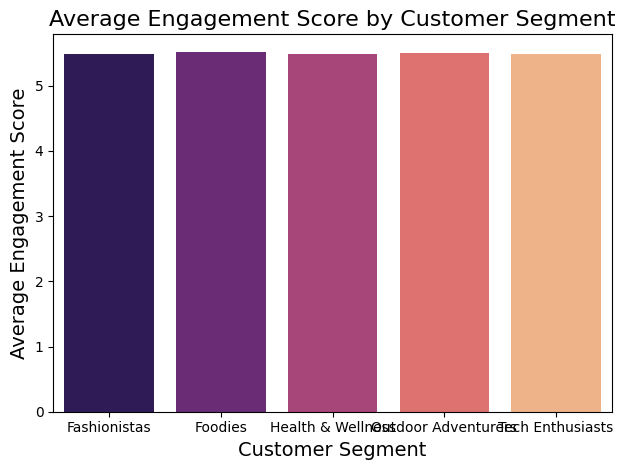

In [ ]:
engagement_plot = sns.barplot(x='Customer_Segment', y='Engagement_Score', data=avg_engagement, palette="magma")
plt.title('Average Engagement Score by Customer Segment', fontsize=16)
plt.xlabel('Customer Segment', fontsize=14)
plt.ylabel('Average Engagement Score', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


** Clicks vs. Impressions by Campaign Type**

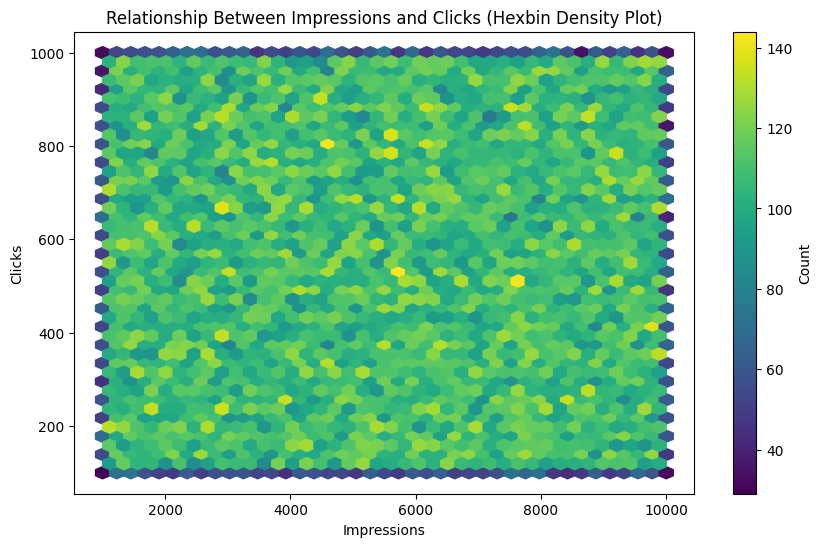

In [ ]:
plt.figure(figsize=(10,6))
plt.hexbin(df['Impressions'], df['Clicks'], gridsize=40, cmap='viridis')
plt.colorbar(label='Count')
plt.title('Relationship Between Impressions and Clicks (Hexbin Density Plot)')
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.show()


**Correlation Matrix: Engagement, Conversion, Acquisition Cost & ROI**

In [ ]:
metrics = df[['Engagement_Score', 'Conversion_Rate', 'Acquisition_Cost', 'ROI']]
correlation_matrix = metrics.corr()
correlation_matrix

,Engagement_Score,Conversion_Rate,Acquisition_Cost,ROI
Engagement_Score,1.000000,-0.000638,-0.003218,0.000588
Conversion_Rate,-0.000638,1.000000,0.000718,-0.001143
Acquisition_Cost,-0.003218,0.000718,1.000000,0.004585
ROI,0.000588,-0.001143,0.004585,1.000000


**Heatmap of Correlation Between Key Marketing Metrics**

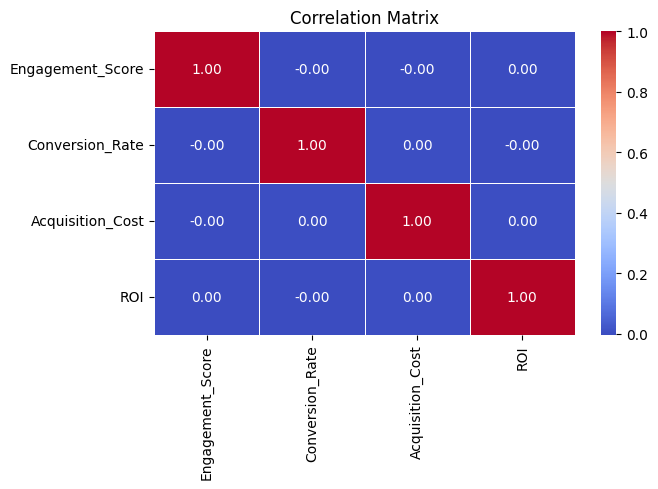

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


### Insight: Correlation Matrix of Key Metrics

- All correlation values are close to zero, indicating **no strong linear relationships** between Engagement Score, Conversion Rate, Acquisition Cost, and ROI.
- This is expected because the dataset is synthetic and all variables were generated with uniform distributions.
- In real marketing data, we would expect patterns such as:
  - higher impressions → higher clicks,
  - lower acquisition cost → higher ROI,
  - higher engagement → better conversion.
- The absence of correlation in this dataset suggests that insights must come from **segmented analysis** (by channel, audience, campaign type) rather than raw metric-to-metric relationships.
